# Assignment 6
### Do Question 6, and three more questions of your choice.


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

Rolling One Fair Six-Sided Die
Sample space: S = {1, 2, 3, 4, 5, 6}.
Each outcome is equally likely, so P(X = k) = 1/6 for each value k in S.

Random Variable Y = sqrt(X)
Let X be the number rolled on the die. Define Y = sqrt(X).

Possible values of Y are: sqrt(1), sqrt(2), sqrt(3), sqrt(4), sqrt(5), sqrt(6).
Since each face of the die is equally likely, each value of Y also occurs with probability 1/6.

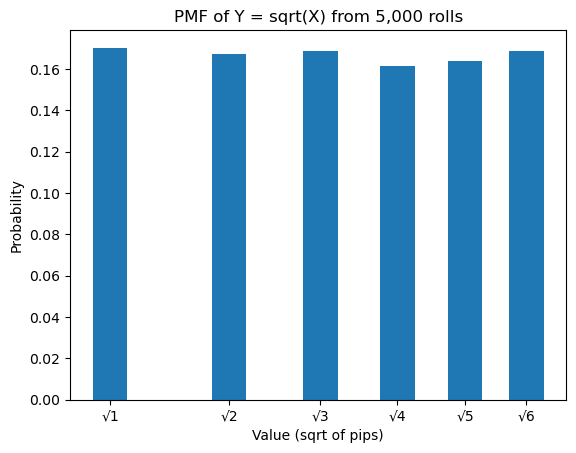

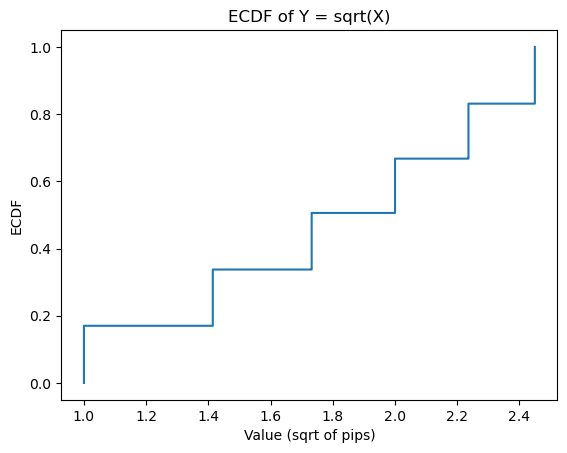

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

rng = np.random.default_rng(42)

# --- simulate one die and transform Y = sqrt(X)
n1 = 5000
x1 = rng.integers(1, 7, size=n1)          
y1 = np.sqrt(x1)

# --- PMF (mass function)
counts_y = Counter(np.round(y1, 6))       
vals = np.array(sorted(counts_y.keys()))
pmf = np.array([counts_y[v] for v in vals]) / n1

plt.figure()
plt.bar(vals, pmf, width=0.12)
plt.xlabel("Value (sqrt of pips)")
plt.ylabel("Probability")
plt.title("PMF of Y = sqrt(X) from 5,000 rolls")
plt.xticks(vals, [f"√{i}" for i in range(1,7)])
plt.show()

# --- ECDF
y_sorted = np.sort(y1)
ecdf = np.arange(1, n1+1) / n1

plt.figure()
plt.step(y_sorted, ecdf, where="post")
plt.xlabel("Value (sqrt of pips)")
plt.ylabel("ECDF")
plt.title("ECDF of Y = sqrt(X)")
plt.show()


Rolling Two Fair Six-Sided Dice
The sample space consists of all ordered pairs (i, j), where i and j are each in {1, 2, 3, 4, 5, 6}. There are 36 total outcomes, all equally likely.

Define the random variable Z = i + j, the sum of the two dice.
The possible values of Z are: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

However, these sums are not equally likely. The probabilities are:

P(Z = 2) = 1/36

P(Z = 3) = 2/36

P(Z = 4) = 3/36

P(Z = 5) = 4/36

P(Z = 6) = 5/36

P(Z = 7) = 6/36

P(Z = 8) = 5/36

P(Z = 9) = 4/36

P(Z = 10) = 3/36

P(Z = 11) = 2/36

P(Z = 12) = 1/36

The sum 7 is the most likely outcome, while 2 and 12 are the least likely.

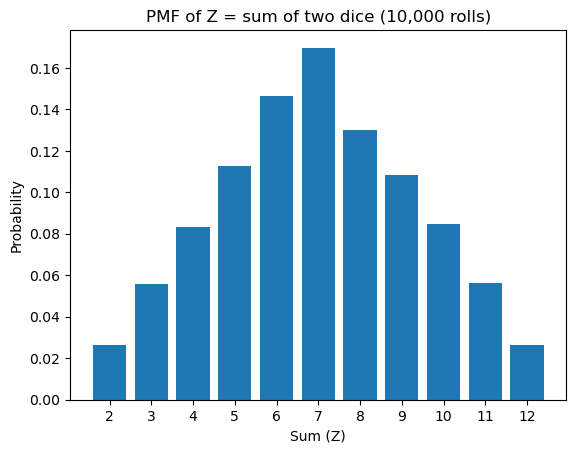

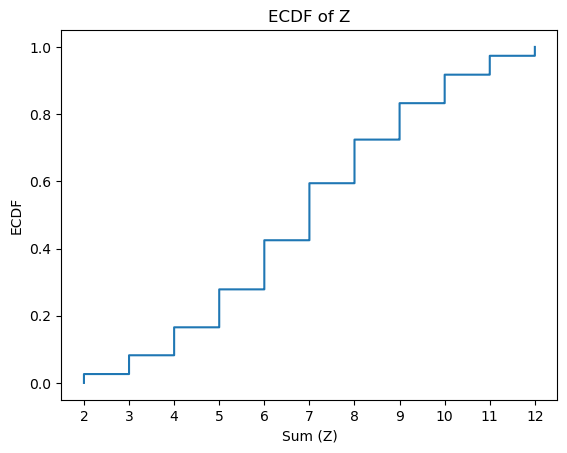

In [2]:
# --- simulate two dice sums
n2 = 10_000
d1 = rng.integers(1, 7, size=n2)
d2 = rng.integers(1, 7, size=n2)
z = d1 + d2  # sums in 2..12

# --- PMF (empirical)
vals_z, counts_z = np.unique(z, return_counts=True)
pmf_z = counts_z / n2

plt.figure()
plt.bar(vals_z, pmf_z)
plt.xlabel("Sum (Z)")
plt.ylabel("Probability")
plt.title("PMF of Z = sum of two dice (10,000 rolls)")
plt.xticks(range(2,13))
plt.show()

# --- ECDF
z_sorted = np.sort(z)
ecdf_z = np.arange(1, n2+1) / n2

plt.figure()
plt.step(z_sorted, ecdf_z, where="post")
plt.xlabel("Sum (Z)")
plt.ylabel("ECDF")
plt.title("ECDF of Z")
plt.xticks(range(2,13))
plt.show()
